# Variables and Variable Selection

© Explore Data Science Academy


## Learning Objectives

In this train you will learn how to:

- Differentiate between Variable Types and Dummy Variables;
- Select features based on correlation;
- Select features based on variance thresholds.

## Outline

In order to meet our learning objectives, this train is structured as follows:

- Introducing the bank customer `personal_loans` dataset;
- Variable Type Characteristics;
- Descriptive Statistics - Encoding Dummy Variables;
- Correlations and Model Structure;
- Variance Thresholds;
- Assessing Model Accuracy.

## Introduction

**Variables** are the basic building blocks of datasets. The quality of the variables present within your dataset has a direct impact on the intuition and overall outcome of your machine learning model. Although similar machine models may be implemented within the same industry, this does not mean they necessarily require the same features. **Variable selection** and an in-depth knowledge of the domain you're building your model in remains essential when developing a predictive model.

The purpose of regression is essentially to build associations between multiple variables. Variable selection involves the elimination of input variables which may in turn reduce the computational cost of modeling and, in some cases, improve the performance of the model. Within this Train we will investigate appropriate ways of performing this model selection. 

The model is structured around the belief that one of the variables in our dataset is a dependent variable (DV), that is explained or predicted in some way by the other independent variables (IVs). In this sense we work with: 

**Input variables** - are referred to as the independent variables (IVs) and used to explain or predict the target variable

**Target variable** - are referred to as the dependent variable (DV) and is the target variable you want to predict

## The `personal_loans` dataset

We have data of **bank customers**. The data includes basic information of each customer as well as whether the customer took out a loan and the size of that loan.

The basic information consists of:
* **Age** - Customer's age in years 
* **Experience** - working experience in years
* **Income** - annual income expressed in multiples of 1000
* **Family** - members in family including the customer self
* **CCAvg** - average monthly spend on credit card
* **Education** - Undergrad/Postgrad/Professional
* **Mortgage** - amount expressed in multiples of 1000'
* **Securities Account** - whether the customer has a securities account
* **CD Account** - whether the customer has a cash deposit account
* **Online** - whether the customer is using online banking
* **Gender** - Male/Female
* **Area** - Geographic area where the customer lives 
* **Personal Loan** - whether the person took out a personal loan
* **Loan Size** - amount expressed in multiples of  1000

As before, we will initially need to import a few Python libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Next** we will load our data as a Pandas DataFrame

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/bootcamps/Personal_Loans.csv')
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,Gender,Area,Personal Loan,Loan Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,1,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,1,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,1,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,1,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,1,35


Some of the columns have white space that we want to replace with an underscore (to avoid using the column names as variable names later on).

In [4]:
df.columns = [col.replace(" ","_") for col in df.columns] 
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,Gender,Area,Personal_Loan,Loan_Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,1,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,1,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,1,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,1,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,1,35


With our data loaded, we now consider doing some preliminary data preprocessing. 

If we want to build some relationship between variables that are likely to indicate the loan amount once someone has taken a loan, we really only want to consider customers who actually took a personal loan to build this relationship:

In [5]:
df = df[df['Personal_Loan'] == 1]
df = df.drop(['Personal_Loan'],axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,Gender,Area,Loan_Size
0,26,2,60,2,3.0,Undergrad,132,0,0,0,Male,Alameda,15
1,26,0,83,3,3.9,Postgrad,0,0,0,1,Female,Ventura,30
2,26,0,129,3,0.7,Postgrad,0,0,0,0,Male,Los Angeles,33
3,26,0,132,3,6.5,Professional,0,0,0,0,Female,Orange,40
4,26,2,132,2,2.4,Professional,0,0,0,0,Male,Alameda,35


In [6]:
df.shape

(471, 13)

## Variable Types

Variables have different levels of inherent statistical and model building information. They may generally be grouped into the following types as seen in the image* below:

*You can copy the image URL below into a new tab to get the full size version to download

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://raw.githubusercontent.com/Explore-AI/Pictures/master/Variable_data_types.jpg')

## Summary Statistics

In this section we will explore the data types and the summary statistics of our variables.

Let's start by looking at the data types and number of entries of each column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 470
Data columns (total 13 columns):
Age                   471 non-null int64
Experience            471 non-null int64
Income                471 non-null int64
Family                471 non-null int64
CCAvg                 471 non-null float64
Education             471 non-null object
Mortgage              471 non-null int64
Securities_Account    471 non-null int64
CD_Account            471 non-null int64
Online                471 non-null int64
Gender                471 non-null object
Area                  471 non-null object
Loan_Size             471 non-null int64
dtypes: float64(1), int64(9), object(3)
memory usage: 51.5+ KB


Note that `df.info()` specifically outputs the number of non-null entries in each column. As such, we can be certain that our data has missing values if columns have a varying number of non-null entries.  

Now let's look at a table showcasing the summary statistics of the data.

In [8]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Loan_Size
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,45.205945,19.991507,144.811040,2.609342,3.901274,101.598726,0.125265,0.286624,0.607219,33.231423
std,11.626366,11.589427,31.761417,1.112902,2.098956,161.389361,0.331372,0.452665,0.488888,9.759205
min,26.000000,0.000000,60.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,35.000000,9.000000,122.000000,2.000000,2.600000,0.000000,0.000000,0.000000,0.000000,26.000000
50%,45.000000,20.000000,143.000000,3.000000,3.800000,0.000000,0.000000,0.000000,1.000000,32.000000
75%,55.000000,30.000000,172.000000,4.000000,5.350000,193.000000,0.000000,1.000000,1.000000,41.000000
max,65.000000,41.000000,203.000000,4.000000,10.000000,617.000000,1.000000,1.000000,1.000000,50.000000


Based on the means and standard deviations of different columns, we may want to consider [standardizing](https://statisticsbyjim.com/regression/standardize-variables-regression/) our data. In this train however, we will only focus on variable selection.

## Dummy Variable Encoding

As can be observed in the above table, we get little information from summary statistics of our numerical categorical data ('Online', 'CD_Account', 'Securities_Account') at the moment.

More importantly, all input data for regression model building purposes needs to be numerical. We therefore have to transform the text data (found within columns such as 'Education','Gender', and 'Area') into numbers before we can train our machine learning model. 

To facilitate this transformation from textual-categorical data to numerical equivalents, we use a pandas method called `get_dummies`. The text data are categorical variables, and `get_dummies` will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has a `1` for observations which were in this category, and a `0` for observations that were not.

For example, the dataframe: 

| Dog Age | Breed      |
|---------|------------|
| 15      | "Bulldog"  |
| 12      | "Labrador" |
| 10      | "Labrador" |
| 22      | "Beagle"   |
| 9       | "Labrador" |


After `pd.dummies` becomes:

| Dog Age | Breed_Labrador | Breed_Bulldog | Breed_Beagle |
|---------|----------------|---------------|--------------|
| 15      | 1              | 0             | 0            |
| 12      | 0              | 1             | 0            |
| 10      | 1              | 0             | 0            |
| 22      | 0              | 0             | 1            |
| 9       | 1              | 0             | 0            |


In general, this is a process known as [Dummy Variable Encoding](https://en.wikiversity.org/wiki/Dummy_variable_(statistics)) and is an important step in preprocessing data for regression analysis.   


Let's see what this process looks like with our personal loans dataset:

In [32]:
df_dummies = pd.get_dummies(df)

# Again we make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns] 

df_dummies.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Loan_Size,...,Area_San_Mateo,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo
0,26,2,60,2,3.0,132,0,0,0,15,...,0,0,0,0,0,0,0,0,0,0
1,26,0,83,3,3.9,0,0,0,1,30,...,0,0,0,0,0,0,0,0,1,0
2,26,0,129,3,0.7,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
3,26,0,132,3,6.5,0,0,0,0,40,...,0,0,0,0,0,0,0,0,0,0
4,26,2,132,2,2.4,0,0,0,0,35,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_dummies.shape

(471, 44)

Suddenly we have many more variable columns (our original 13 variable columns are now 44 given the dummy variable encoding). 

## Correlations and Model Structure

Using the dummy variable dataframe, we can build a model that predicts `Loan_Size` (our dependent variable) as a function of 43 different independent variables (IVs)

Before we do this, however, let's reorder columns so that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easier to interpret. 

In [12]:
column_titles = [col for col in df_dummies.columns if col!= 'Loan_Size'] + ['Loan_Size']
df_dummies=df_dummies.reindex(columns=column_titles)

... now let's see the correlation matrix

In [13]:
df_dummies.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Postgrad,...,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo,Loan_Size
Age,1.000000,0.994515,0.015225,-0.000511,-0.001101,0.032283,-0.024383,0.058700,0.032229,-0.029279,...,-0.013636,0.018168,-0.003689,0.056028,-0.008313,-0.006905,-0.064364,-0.002742,0.020305,-0.130709
Experience,0.994515,1.000000,0.009290,0.008815,-0.016679,0.027737,-0.020221,0.064950,0.034709,-0.026661,...,-0.016887,0.008422,0.000090,0.059995,-0.009162,-0.008093,-0.063715,0.000113,0.025643,-0.131946
Income,0.015225,0.009290,1.000000,-0.024424,0.225125,0.185415,-0.046466,0.076141,0.074409,0.027000,...,0.011555,0.058393,-0.020837,0.075340,-0.067657,-0.008274,0.054066,-0.015916,-0.016307,0.522566
Family,-0.000511,0.008815,-0.024424,1.000000,0.007318,0.065640,-0.097798,-0.001103,-0.036258,-0.037272,...,-0.021532,-0.102810,-0.004189,0.028135,0.052141,0.022887,-0.066773,-0.059468,0.016631,0.097280
CCAvg,-0.001101,-0.016679,0.225125,0.007318,1.000000,0.026942,0.021183,0.036788,-0.019209,0.033567,...,-0.015515,-0.025163,0.009131,0.138691,0.005043,0.062233,-0.004428,0.097795,0.017944,0.420913
Mortgage,0.032283,0.027737,0.185415,0.065640,0.026942,1.000000,-0.026032,0.091658,0.076362,-0.055804,...,0.107640,-0.023643,-0.023965,0.078169,-0.050456,0.048195,-0.029069,-0.036239,0.068001,-0.496354
Securities_Account,-0.024383,-0.020221,-0.046466,-0.097798,0.021183,-0.026032,1.000000,0.469349,0.054820,-0.003932,...,0.026419,-0.002559,-0.046480,0.050326,0.050326,0.128594,-0.017455,-0.016050,-0.000105,0.022597
CD_Account,0.058700,0.064950,0.076141,-0.001103,0.036788,0.091658,0.469349,1.000000,0.375201,0.028866,...,-0.004752,-0.050905,0.038557,0.067291,0.008270,0.053602,-0.029238,-0.035842,-0.046983,-0.011676
Online,0.032229,0.034709,0.074409,-0.036258,-0.019209,0.076362,0.054820,0.375201,1.000000,0.097867,...,-0.019557,-0.039967,-0.009001,0.009746,0.009746,-0.024939,0.037098,-0.019557,-0.028859,-0.019705
Education_Postgrad,-0.029279,-0.026661,0.027000,-0.037272,0.033567,-0.055804,-0.003932,0.028866,0.097867,1.000000,...,-0.004555,0.017083,0.049019,-0.007362,0.047680,0.067646,-0.035952,0.024438,-0.034679,0.078517


... and the correlation heatmap

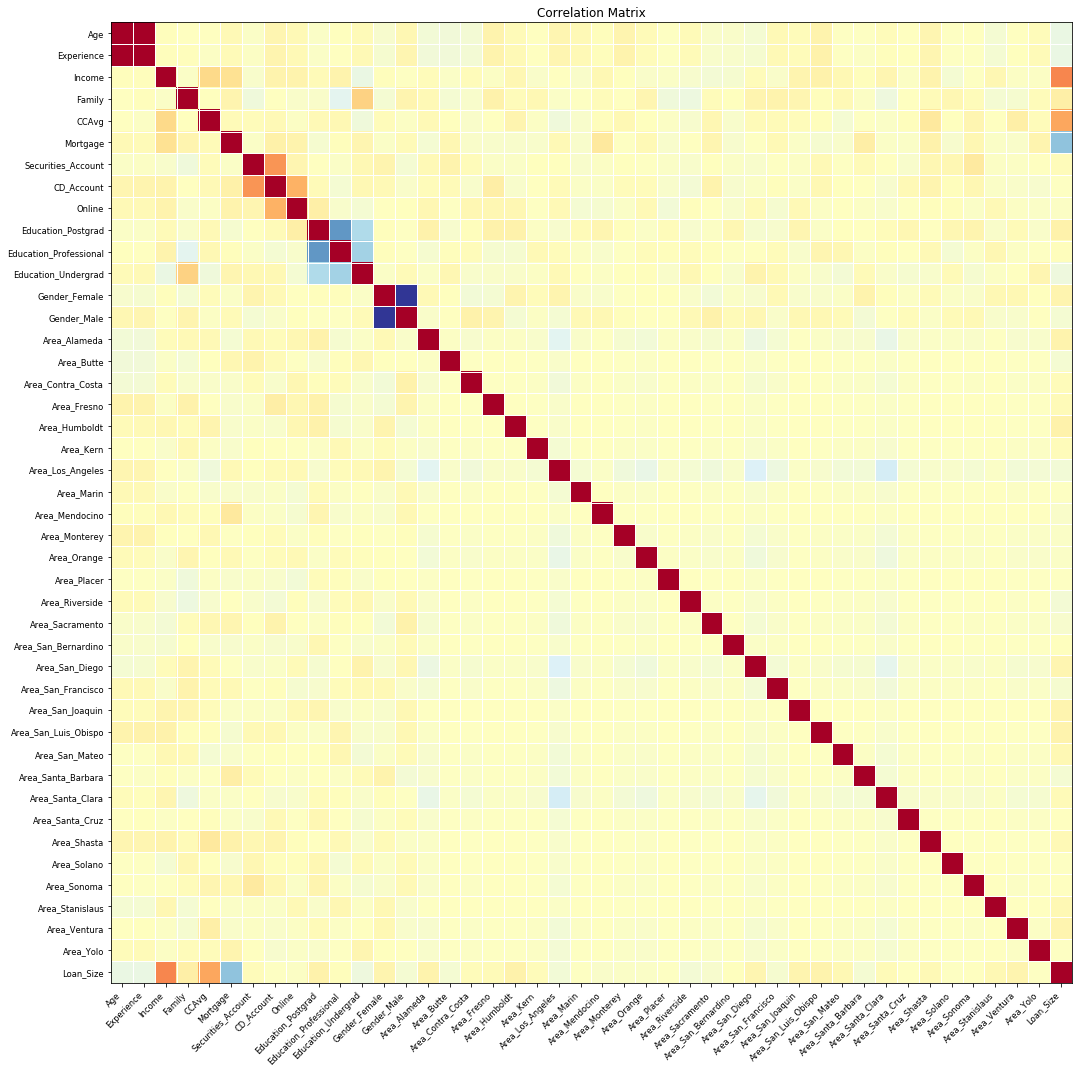

In [14]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

We can see from the correlations that it's not be the best idea to keep all of the dummy variables.

If we use all of these variables, we're effectively working with superfluous or redundant information. Our model will also have collinearity issues:

- `Gender_Male` and `Gender_Female` are perfectly negative correlated

This will likely be a problem when we build a model - let's check what an OLS model summary says.

## Fitting the model using `statsmodels.OLS`

### Generating the regression string

We will be importing the statsmodels library which has a rich set of statistical tools to help us. Those of you familiar with the R language will know that fitting a machine learning model requires a sort of string of the form:

`y ~ X`

which is read as follows: "Regress y on X". `statsmodels` works in a similar way, so we need to generate an appropriate string to feed to the method when we wish to fit the model.

In [15]:
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = df_dummies.copy()

# The dependent variable:
y_name = 'Loan_Size'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 Loan_Size ~ Age + Experience + Income + Family + CCAvg + Mortgage + Securities_Account + CD_Account + Online + Education_Postgrad + Education_Professional + Education_Undergrad + Gender_Female + Gender_Male + Area_Alameda + Area_Butte + Area_Contra_Costa + Area_Fresno + Area_Humboldt + Area_Kern + Area_Los_Angeles + Area_Marin + Area_Mendocino + Area_Monterey + Area_Orange + Area_Placer + Area_Riverside + Area_Sacramento + Area_San_Bernardino + Area_San_Diego + Area_San_Francisco + Area_San_Joaquin + Area_San_Luis_Obispo + Area_San_Mateo + Area_Santa_Barbara + Area_Santa_Clara + Area_Santa_Cruz + Area_Shasta + Area_Solano + Area_Sonoma + Area_Stanislaus + Area_Ventura + Area_Yolo


In [16]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     37.56
Date:                Sat, 02 May 2020   Prob (F-statistic):          1.71e-115
Time:                        13:21:01   Log-Likelihood:                -1387.0
No. Observations:                 471   AIC:                             2856.
Df Residuals:                     430   BIC:                             3026.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

We can see that there is a warning about strong multicollinearity. This is likely as a result of the incorrect filtering of one hot encoded dummy variables ( we noticed earlier that `Gender_Male` and `Gender_Female` are perfectly negative correlated).

In order to ensure that we don't assume an underlying relationship between the categories, we can call `pd.get_dummies` with the argument `drop_first=True` so that we only create n-1 columns for each variable with n categories (i.e. one variable/column with five categories will be transformed into four columns of 0's and 1's). 

In [19]:
df_dummies = pd.get_dummies(df, drop_first=True)

# Again make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ", "_") for col in df_dummies.columns]

# Reorder columns with the dependent variable (claim_amount) the last column
column_titles = [col for col in df_dummies.columns if col !=
                 'Loan_Size'] + ['Loan_Size']
df_dummies = df_dummies.reindex(columns=column_titles)

df_dummies.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Professional,...,Area_Santa_Barbara,Area_Santa_Clara,Area_Santa_Cruz,Area_Shasta,Area_Solano,Area_Sonoma,Area_Stanislaus,Area_Ventura,Area_Yolo,Loan_Size
0,26,2,60,2,3.0,132,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,26,0,83,3,3.9,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,30
2,26,0,129,3,0.7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
3,26,0,132,3,6.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,40
4,26,2,132,2,2.4,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,35


In [20]:
df_dummies.shape

(471, 41)

We now have 41 columns instead of 44. This gives us 40 potential independent variables that could be used to build a relationship on `Loan_Size`

**Let's check what the OLS model summary would say if we now fit only the 41 variable columns**

In [21]:
# We'll keep the model DataFrame, but only specify the columns we want to fit this time
X_names = [col for col in df_dummies.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+' ~ '+'+'.join(X_names)

# Fit the model using the model dataframe
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     37.56
Date:                Sat, 02 May 2020   Prob (F-statistic):          1.71e-115
Time:                        13:25:55   Log-Likelihood:                -1387.0
No. Observations:                 471   AIC:                             2856.
Df Residuals:                     430   BIC:                             3026.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 12

We see that the **condition number** has improved, but there is still mention of strong multicollinearity in warning **\[2\]**

We also see that the Q1 - Q3 range of coefficients and expected errors are larger than the absolute size of the coefficients themselves...

Let's make further selections on the variables now using their significance.

## Variable Selection by Correlation and Significance

We now have 40 predictor variables to choose from, so we need a way of guiding us to choose the best ones to be our predictors. One way is to look at the correlations between the `Loan Size` and each variables in our DataFrame and select those with the strongest correlations (both positive and negative).

We also need to consider how significant those features are. 

The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame for reference.

In [22]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['Loan_Size'].sort_values(ascending=False)

Using [Pearson regression](http://sites.utexas.edu/sos/guided/inferential/numeric/bivariate/cor/) from SciPy:

In [25]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Loan_Size']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['Loan_Size'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Income,0.522566,0.000000
Mortgage,-0.496354,0.000000
CCAvg,0.420913,0.000000
Experience,-0.131946,0.004124
Age,-0.130709,0.004492
Education_Undergrad,-0.107046,0.020143
Family,0.097280,0.034806
Area_Los_Angeles,-0.079507,0.084773
Area_Humboldt,0.078831,0.087459
Area_San_Luis_Obispo,0.076123,0.098929


Now, we've got a sorted list of the p-values and correlation coefficients for each of the features, when considered on their own.  

If we were to use a logic test with a significance value of 5% (p-value < 0.05), we could infer that the following features are statistically significant:

* Income
* Mortgage
* CCAvg
* Experience
* Age
* Education_Undergrad
* Family

Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame `X`

In [27]:
# The dependent variable remains the same:
y_data = df_dummies[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]

However, we also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

In [29]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Income,CCAvg,Family,Education_Undergrad,Age,Experience,Mortgage
Income,1.0,NaN,NaN,NaN,NaN,NaN,NaN
CCAvg,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Family,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Education_Undergrad,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,1.000000,0.994515,NaN
Experience,NaN,NaN,NaN,NaN,0.994515,1.000000,NaN
Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

In [139]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Experience,Age
Age,0.994515,1.000000
Experience,1.000000,0.994515


Okay, so it looks like `Age` and `Experience` are highly correlated (perhaps unsurprising if you take a moment to think about it).

This is also visible looking back at the correlation coefficient heatmap and matrix from earlier, but a more focused / subset view of the matrix is useful to isolate the coefficients of interest.

Considering which predictor variable to drop, `Experience` is slightly better correlated (and lower p-value) to the dependent variable `Loan Size`, so let's drop `Age` form the feature dataframe.

Now let's see what the resulting OLS fit summary says:

In [30]:
# Lets take a new subset of our potential independent variables
X_remove = ['Age']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	Loan_Size ~ Income + CCAvg + Family + Education_Undergrad + Experience + Mortgage


In [35]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sat, 02 May 2020   Prob (F-statistic):          3.07e-142
Time:                        14:52:48   Log-Likelihood:                -1400.3
No. Observations:                 471   AIC:                             2815.
Df Residuals:                     464   BIC:                             2844.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.5057    

## Variable Selection by Variance Thresholds

Variance Thresholds remove features whose values don't change much from observation to observation. The objective here is to remove all features that have a variance lower than the selected threshold.

For example, suppose that in our loans dataset 97% of observations were for 40-year-old women, then the *Age* and *Gender* features can be removed without a great loss in information.

It is important to note that variance is dependent on scale, so the features will have to be normalized before implementing variance thresholding.

In [37]:
# Separate data into independent (X) and independent (y) variables
X_names = list(df_dummies.columns)
X_names.remove(y_name)
X_data = df_dummies[X_names]
y_data = df_dummies[y_name]

In [39]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

### Variance Threshold in Scikit Learn

To implement Variance Threshold in Scikit Learn we have to do the following:

Import and create an instance of the VarianceThreshold class;
Use the .fit() method to select subset of features based on the threshold.

In [40]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

The Variance Threshold has been applied to the data. Let's look at the calculated variance for each predictive variable. 

In [41]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
13,Gender_Male,0.249945
12,Gender_Female,0.249945
10,Education_Professional,0.244941
8,Online,0.238504
9,Education_Postgrad,0.235096
7,CD_Account,0.204471
20,Area_Los_Angeles,0.179002
11,Education_Undergrad,0.155877
3,Family,0.137325
35,Area_Santa_Clara,0.130968


The above table shows the variances of the individual columns before any threshold is applied. It allows us to revise our initial variance threshold if we feel that we might exclude important variables.


Next we need to extract the results and use them to select our new columns - which form a subset of all the columns.

In [42]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,Education_Postgrad,...,Gender_Female,Gender_Male,Area_Alameda,Area_Los_Angeles,Area_Monterey,Area_Orange,Area_Sacramento,Area_San_Diego,Area_San_Francisco,Area_Santa_Clara
0,0.0,0.04878,0.000000,0.333333,0.30,0.213938,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.160839,0.666667,0.39,0.000000,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.482517,0.666667,0.07,0.000000,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.503497,0.666667,0.65,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.04878,0.503497,0.333333,0.24,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X_new.shape

(471, 22)

With a threshold of 0.03 we have have gone from 40 to 19 predictors.

Let's try a few more thresholds to see what we end up with:

In [44]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)

In [45]:
selector_1.fit(X_normalize)

VarianceThreshold(threshold=0.05)

In [46]:
selector_2.fit(X_normalize)

VarianceThreshold(threshold=0.1)

In [47]:
selector_3.fit(X_normalize)

VarianceThreshold(threshold=0.15)

In [48]:
# Select subset of columns
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

Now let's graph the number of predictors by the thresholds to investigate the relationship:

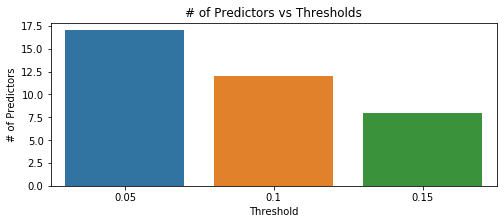

In [49]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.05', '0.1', '0.15']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

We can see from the above graph that as we increase the threshold, the number of dimensions decrease

### Exercise 

Can you extract the predictor names of the 3 different datasets above?



Let's see what the resulting OLS fit summary for a threshold of 0.03 says:

In [50]:
# What is our new OLS formula?
formula_str = y_name+' ~ '+' + '.join(X_new.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	Loan_Size ~ Age + Experience + Income + Family + CCAvg + Mortgage + Securities_Account + CD_Account + Online + Education_Postgrad + Education_Professional + Education_Undergrad + Gender_Female + Gender_Male + Area_Alameda + Area_Los_Angeles + Area_Monterey + Area_Orange + Area_Sacramento + Area_San_Diego + Area_San_Francisco + Area_Santa_Clara


In [51]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=df_dummies)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              Loan_Size   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     77.12
Date:                Sat, 02 May 2020   Prob (F-statistic):          2.05e-131
Time:                        15:11:27   Log-Likelihood:                -1390.5
No. Observations:                 471   AIC:                             2823.
Df Residuals:                     450   BIC:                             2910.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

### Advantages & Disadvantages of Variance Thresholds

Let's consider some trade-offs associated with using variance thresholds for variable selection: 

**Advantages**

* Applying variance thresholds is based on solid intuition: features that don't change much also don't add much information;
* Easy and relatively safe way to reduce dimensionality (i.e. number of features) at the start of the modeling process.

**Disadvantages**

* Not the ideal algorithm if dimensionality reduction is not really required;
* The threshold must be manually tuned, which can be a fickle process requiring domain/problem expertise.

## Model prediction of Loan Size 

Now that we have thinned out our DataFrame using various methods, let's see if we can fit linear regression models and compare them.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Preprocess data

First we need to make sure that all models are trained and tested on the same data.

In [54]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [55]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [56]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

### Fit models

Next we instantiate and fit our models

In [61]:
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [62]:
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

### Exercise 

Compare the intercepts and coeffiecients of the three models above, what do you notice?


### Assess model accuracy 
Let's see how our linear models performed!

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

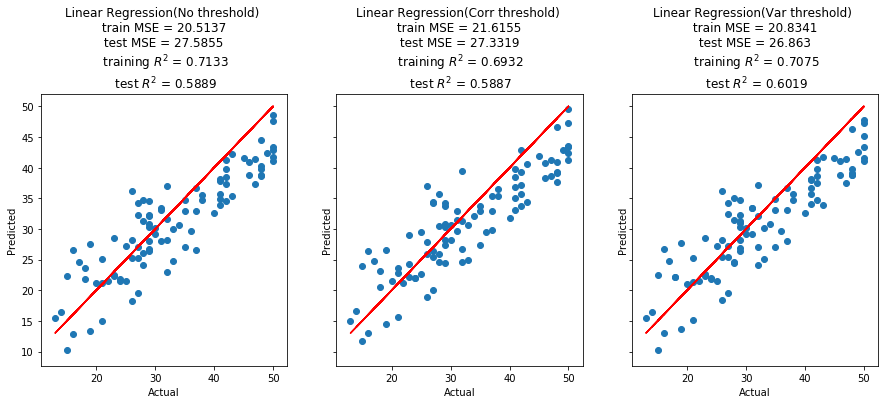

In [69]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

We can see from the results that we have managed to slightly improve our model by using fewer predictors. Sometimes, it would seem less really *is* more.   

It's interesting to note that although our training MSE for the "No threshold" model was the lowest at training, it increases to the highest of the three models at testing. This is a sign that the model was overfitting the data, and the other two models have a better capacity for generalising to new data.

## Conclusion 

In this train we learned about variables and the some of the different variable types that can exist in the datasets we attempt to model. We also learned how to deal with categorical data types using dummy variable encoding. We were introduced to various methods of variable selection and elimination; particularly implementing the use of summary statistics, correlation, significance and variance threshold methods for variable selection. 

## Appendix 

Links to additional resources to help with the understanding of concepts presented in the train:

[Feature selection with real and categorical data](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)